# Task1 
##Compare the outcomes of different implementations of KDEs.

There are several options available for computing KDE in Python.
- SciPy: gaussian_kde.
- Statsmodels: KDEUnivariate and KDEMultivariate.
- Scikit-learn: KernelDensity.


##1). Generate synthethic data and plot them
Generate synthetic dataset the distribution of which can be presented as a combination of three Gausian distributions with the following parameters: $\mu_1$=1, $\sigma_1$=1 and $\mu_2$=8, $\sigma_2$=2 and $\mu_2$=14, $\sigma_2$=1.5. Generate 1000 samples from the distribution.
<br>
Plot the pdf of this distribution and the generated samples.
<br>
3) Use the generated samples to perform 
- (i) KDE with Scipy, 
- (ii) Univariate KDE with Statsmodels, 
- (iii) Multivariate KDE with Statsmodels as well as 
- (iv) KDE with Scikit-learn.
<br>
4) Plot all four distributions on one figure.  

In [63]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

%matplotlib inline

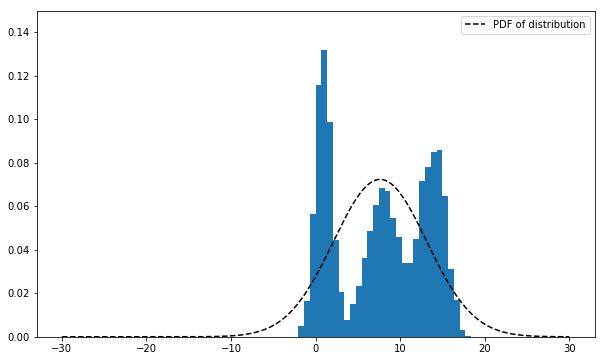

In [57]:
np.random.seed(0)
gaussian1 = 1 + 1 * np.random.randn(1000)
gaussian2 = 8 + 2 * np.random.randn(1000)
gaussian3 = 14 + 1.5 * np.random.randn(1000)
gaussian_mixture = np.hstack([gaussian1, gaussian2, gaussian3])

df = pd.DataFrame(gaussian_mixture, columns=['data'])
# parametric fit: assume normal distribution
loc_param, scale_param = stats.norm.fit(df)
param_density = stats.norm.pdf(x, loc=loc_param, scale=scale_param)


fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df.values, bins=30, normed=True)
ax.plot(x, param_density, 'k--', label='PDF of distribution')
ax.set_ylim([0, 0.15])
ax.legend(loc='best')


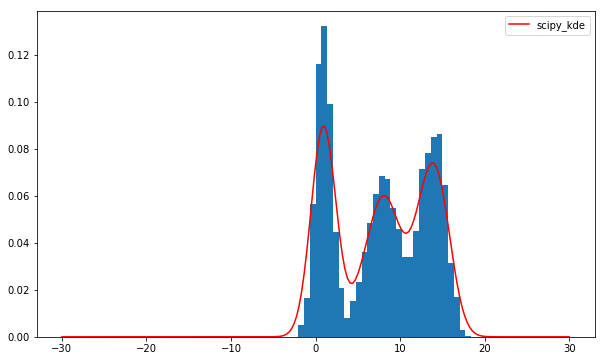

In [62]:
# non-parametric pdf
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df.values, bins=30, normed=True)
scipy_kde = stats.gaussian_kde(df.values.ravel())

x = np.linspace(-30, 30, 200)
scipy_kde = scipy_kde(x)
ax.plot(x, scipy_kde, 'r-', label='scipy_kde')
ax.legend(loc='best')